In [1]:
import pandas as pd
import os

In [2]:
DIR_REG = '/home/gtrindadi/jds_june_2019/data-sendatree/data-registration/'

# count the quantity of files in a directory
# files_count-1 because in this folder there is one file that doens't represent the data

files_count = len([name for name in os.listdir(DIR_REG) if os.path.isfile(os.path.join(DIR_REG, name))]) - 1
print(files_count)

273


In [3]:
column_names_registrations = ['file_name', 'date', 'time', 'user_id', 'event', 
                              'birth_year', 'device_type', 'country', 'source']

In [4]:
registrations = pd.DataFrame()

for i in range(1, files_count+1):
    aux = pd.read_csv(DIR_REG+'day_'+str(i), delimiter=' ', names=column_names_registrations)
    registrations = pd.concat([registrations, aux])

In [5]:
registrations.head()

,file_name,date,time,user_id,event,birth_year,device_type,country,source
0,day_1,2019-01-18,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend
1,day_1,2019-01-18,00:55:42,1000002,registration,1986,ios,united_states,invite_a_friend
2,day_1,2019-01-18,01:05:20,1000003,registration,1989,error,sweden,invite_a_friend
3,day_1,2019-01-18,01:23:24,1000004,registration,1994,error,germany,invite_a_friend
4,day_1,2019-01-18,01:24:16,1000005,registration,1986,ios,united_states,invite_a_friend


In [6]:
registrations.tail()

,file_name,date,time,user_id,event,birth_year,device_type,country,source
4917,day_273,2019-10-17,23:58:40,1284418,registration,1991,ios,philippines,article
4918,day_273,2019-10-17,23:58:57,1284419,registration,1989,ios,brazil,paid
4919,day_273,2019-10-17,23:59:08,1284420,registration,1985,android,sweden,google
4920,day_273,2019-10-17,23:59:22,1284421,registration,1991,error,united_states,invite_a_friend
4921,day_273,2019-10-17,23:59:47,1284422,registration,1987,error,united_states,invite_a_friend


## Which location brought the most registrations to Send-a-Tree?

In [65]:
registrations[['country','user_id']].groupby('country').count().sort_values(by='user_id', ascending=False).head(1)

,user_id
country,
united_states,128492


## Which micro segment (combination of 'source', 'phone_type', 'location' and 'birth_year') has the most registered users?

In [68]:
registrations.groupby(['source', 'device_type', 
                       'country', 'birth_year'])[['user_id']].count().sort_values(by='user_id', 
                                                                                  ascending=False).head(1)

,,,,user_id
source,device_type,country,birth_year,
invite_a_friend,android,united_states,1987,3109


## What source brought the most super tree sends?

In [9]:
DIR_SUPER = '/home/gtrindadi/jds_june_2019/data-sendatree/data-super-tree/'

column_names_sends = ['file_name', 'date', 'user_id', 'event']

super_tree = pd.DataFrame()

for i in range(1, files_count+1):
    aux = pd.read_csv(DIR_SUPER+'day_'+str(i), delimiter=' ', names=column_names_sends)
    super_tree = pd.concat([super_tree, aux])

In [10]:
super_tree.head()

,file_name,date,user_id,event
0,day_1,2019-01-18,1000080,sent_a_super_tree
1,day_1,2019-01-18,1000080,sent_a_super_tree
2,day_1,2019-01-18,1000042,sent_a_super_tree
3,day_1,2019-01-18,1000037,sent_a_super_tree
4,day_1,2019-01-18,1000037,sent_a_super_tree


In [11]:
super_tree.tail()

,file_name,date,user_id,event
3036,day_273,2019-10-17,1277650,sent_a_super_tree
3037,day_273,2019-10-17,1275865,sent_a_super_tree
3038,day_273,2019-10-17,1281894,sent_a_super_tree
3039,day_273,2019-10-17,1281894,sent_a_super_tree
3040,day_273,2019-10-17,1281894,sent_a_super_tree


In [60]:
super_tree.merge(registrations, how='left', 
                   left_on='user_id', right_on='user_id').groupby('source')[['user_id']].count().sort_values(
by='user_id', ascending=False).head(1)

,user_id
source,
invite_a_friend,145705


## Visualize the number of daily registrations on a line chart!

In [15]:
import matplotlib.pyplot as plt

In [31]:
daily_registrations = registrations.groupby('date')['user_id'].count()
daily_registrations

date
2019-01-18     104
2019-01-19      86
2019-01-20      82
2019-01-21     115
2019-01-22     112
2019-01-23     113
2019-01-24     119
2019-01-25     119
2019-01-26      94
2019-01-27     103
2019-01-28     128
2019-01-29     132
2019-01-30     131
2019-01-31     134
2019-02-01     132
2019-02-02     112
2019-02-03     104
2019-02-04     138
2019-02-05     136
2019-02-06     140
2019-02-07     147
2019-02-08     156
2019-02-09     107
2019-02-10     129
2019-02-11     153
2019-02-12     158
2019-02-13     153
2019-02-14     151
2019-02-15     151
2019-02-16     123
              ... 
2019-09-18    3039
2019-09-19    2988
2019-09-20    2993
2019-09-21    2046
2019-09-22    2243
2019-09-23    2915
2019-09-24    3006
2019-09-25    3074
2019-09-26    3236
2019-09-27    3408
2019-09-28    2288
2019-09-29    2958
2019-09-30    3526
2019-10-01    3736
2019-10-02    3842
2019-10-03    3946
2019-10-04    3904
2019-10-05    2919
2019-10-06    2929
2019-10-07    4269
2019-10-08    4259
2019-10

In [51]:
date_reg = list(daily_registrations.keys())

date_reg

['2019-01-18',
 '2019-01-19',
 '2019-01-20',
 '2019-01-21',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-26',
 '2019-01-27',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-01-31',
 '2019-02-01',
 '2019-02-02',
 '2019-02-03',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-09',
 '2019-02-10',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-16',
 '2019-02-17',
 '2019-02-18',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-22',
 '2019-02-23',
 '2019-02-24',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-01',
 '2019-03-02',
 '2019-03-03',
 '2019-03-04',
 '2019-03-05',
 '2019-03-06',
 '2019-03-07',
 '2019-03-08',
 '2019-03-09',
 '2019-03-10',
 '2019-03-11',
 '2019-03-12',
 '2019-03-13',
 '2019-03-14',
 '2019-03-15',
 '2019-03-16',
 '2019-03-17',
 '2019-03-18',
 '2019-03-19',
 '2019-03-20',
 '2019-03-21',
 '2019-03-22',
 '2019-03-23',
 '2019-03-24',
 '2019-03-

In [53]:
count_reg = []

for i in daily_registrations:
    count_reg.append(i)
    
count_reg

[104,
 86,
 82,
 115,
 112,
 113,
 119,
 119,
 94,
 103,
 128,
 132,
 131,
 134,
 132,
 112,
 104,
 138,
 136,
 140,
 147,
 156,
 107,
 129,
 153,
 158,
 153,
 151,
 151,
 123,
 128,
 161,
 158,
 164,
 163,
 172,
 125,
 119,
 176,
 177,
 180,
 178,
 187,
 143,
 145,
 189,
 185,
 183,
 190,
 186,
 158,
 143,
 209,
 204,
 214,
 221,
 226,
 155,
 169,
 225,
 227,
 227,
 231,
 241,
 195,
 183,
 253,
 256,
 262,
 274,
 277,
 219,
 191,
 276,
 279,
 282,
 293,
 293,
 220,
 249,
 324,
 340,
 330,
 342,
 358,
 264,
 282,
 343,
 343,
 336,
 343,
 348,
 245,
 239,
 370,
 364,
 376,
 372,
 364,
 290,
 252,
 352,
 352,
 357,
 354,
 360,
 239,
 260,
 364,
 373,
 389,
 402,
 418,
 326,
 326,
 418,
 433,
 445,
 465,
 462,
 333,
 339,
 526,
 512,
 521,
 532,
 556,
 407,
 382,
 580,
 567,
 560,
 562,
 549,
 449,
 409,
 577,
 605,
 633,
 658,
 644,
 479,
 545,
 710,
 741,
 761,
 754,
 760,
 489,
 610,
 759,
 782,
 772,
 804,
 817,
 659,
 567,
 888,
 914,
 963,
 990,
 1029,
 751,
 694,
 1094,
 1115,
 110

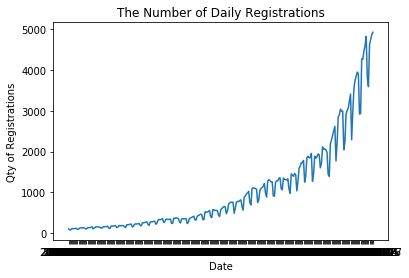

In [55]:
plt.plot(date_reg, count_reg)

plt.xlabel('Date')
plt.ylabel('Qty of Registrations')
plt.title('The Number of Daily Registrations')
plt.show()

### Simple way to plot a Series

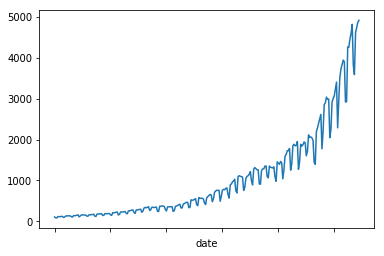

In [73]:
daily_registrations.plot()
plt.show()